# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** Jakub Koziński

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [3]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


Współczynniki wielomianu w1 to: [-6. 11. -6.  1.]


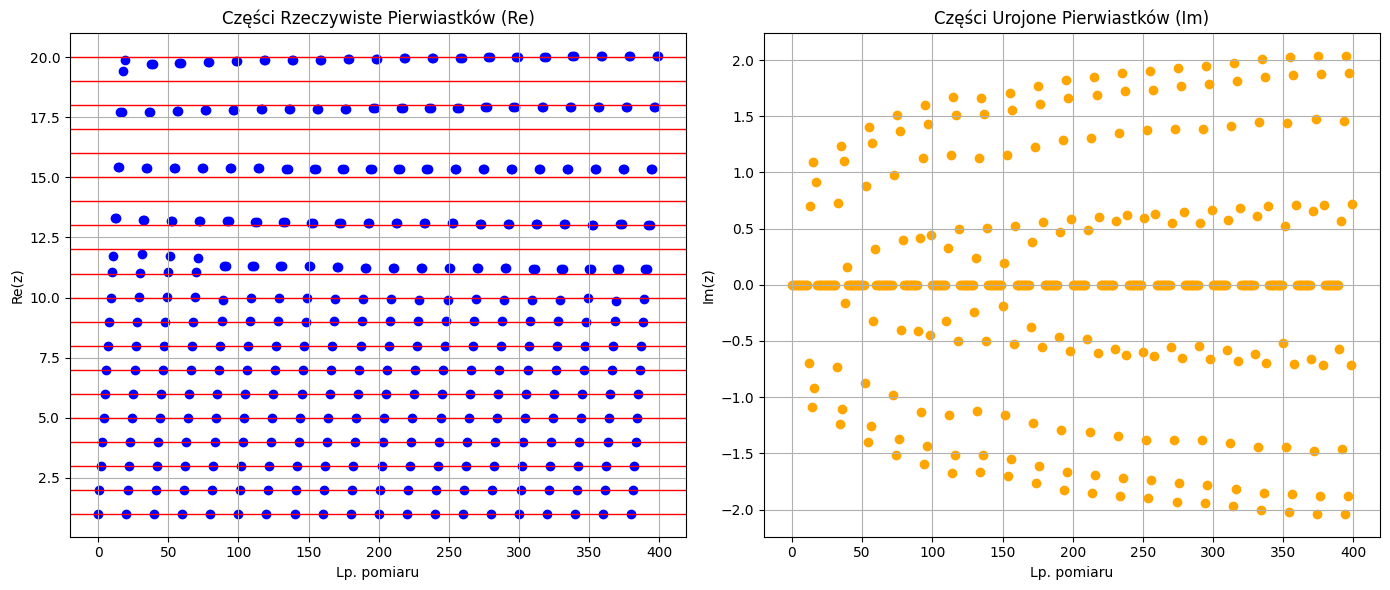

In [4]:
# ===== Twoja implementacja tutaj =====
from main import roots_20
wsp = nppoly.polyfromroots([1,2,3])
print(f'Współczynniki wielomianu w1 to: {wsp}')
#Punkt 2
idealne_pierwiastki = np.arange(1, 21)
wspolczynniki_w2 = nppoly.polyfromroots(idealne_pierwiastki)

roots_re = []
roots_im = [] 

aktualne_wsp = wspolczynniki_w2.copy()

for i in range(20):
    wynik = roots_20(aktualne_wsp)
    
    nowe_wsp, pierwiastki = wynik
    
    aktualne_wsp = nowe_wsp
    
    roots_re.extend(pierwiastki.real)
    roots_im.extend(pierwiastki.imag)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(range(len(roots_re)), roots_re, color='blue')
ax1.set_title("Części Rzeczywiste Pierwiastków (Re)")
ax1.set_ylabel("Re(z)")
ax1.set_xlabel("Lp. pomiaru")
ax1.grid(True)

for root in idealne_pierwiastki:
    ax1.axhline(root, color='red', linewidth=1)

ax2.scatter(range(len(roots_im)), roots_im, color='orange')
ax2.set_title("Części Urojone Pierwiastków (Im)")
ax2.set_ylabel("Im(z)")
ax2.set_xlabel("Lp. pomiaru")
ax2.grid(True)

plt.tight_layout()
plt.show()

W zadaniu analizowano stabilność obliczania pierwiastków wielomianu metodą iteracyjnego przeliczania współczynników. Jako punkt odniesienia przyjęto wielomian o pierwiastkach dokładnych równych 1,2,3,…,20. Za pomocą nppoly.polyfromroots obliczono jego współczynniki, a następnie przez 20 iteracji wielomian był ponownie odtwarzany z pierwiastków wyznaczonych numerycznie przez funkcję roots_20.

Na wykresie po lewej stronie przedstawiono części rzeczywiste wszystkich wyznaczonych pierwiastków. Czerwone poziome linie oznaczają wartości analityczne (1–20), natomiast niebieskie punkty – wyniki numeryczne. Widać, że rzeczywiste części dobrze pokrywają się z wartościami idealnymi, jednak z każdą iteracją pojawiają się drobne odchylenia związane z błędami numerycznymi.

Wykres po prawej pokazuje części urojone pierwiastków. Teoretycznie powinny one wynosić zero, jednak widoczne są niewielkie zaburzenia dodatnie i ujemne. Ich obecność wynika z faktu, że kolejne iteracje wielomianu wzmacniają błędy zaokrągleń oraz pogarszają uwarunkowanie zadania. Wielomiany wysokich stopni są szczególnie wrażliwe na błędy numeryczne, co powoduje powstawanie zespolonych pierwiastków mimo tego, że w rzeczywistości pierwiastki są wyłącznie rzeczywiste.

Podsumowując, wykresy dobrze pokazują zjawisko niestabilności numerycznej oraz amplifikacji błędów w procesie iteracyjnego wyznaczania współczynników wielomianu i jego pierwiastków.

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Macierz frobeniusa dla wielomianu (x-1)^8 to:
[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
Wartości własne macierzy Frobeniusa to:
[1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]
Postać Schura macierzy Frobeniusa to:
[[ 1.01798620e+00 -4.43722411e-01  2.70223683e-01  9.23108070e-01
   1.43763057e+00  3.54593543e+00  9.97914626e+00  4.12474910e+01]
 [ 0.00000000e+00  1.01272357e+00 -1.01218994e+00 -8.27677960e-01
  -2.40178497e+00 -4.93649158e+00 -1.44569499e+01 -5.94408141e+01]
 [ 0.00000000e+00  1.59751087e-04  1.01272357e+00  1.60516788e+00
   1.857354

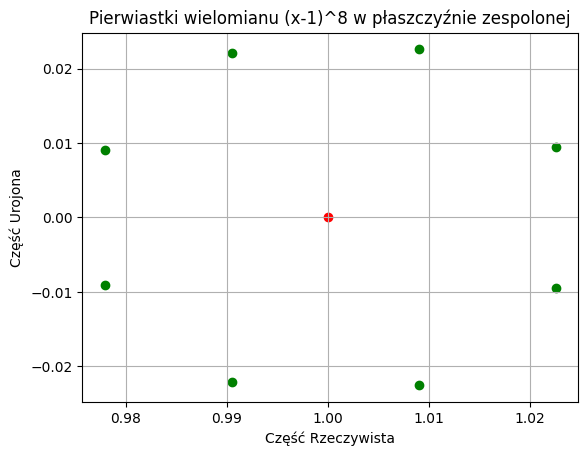

In [5]:
# ===== Twoja implementacja tutaj =====

#Punkt 1
roots3 = np.ones(8)
a3 = nppoly.polyfromroots(roots3)
macierz = main.frob_a(a3)
print(f'Macierz frobeniusa dla wielomianu (x-1)^8 to:\n{macierz}')

#Punkt 2
wlasne = np.linalg.eigvals(macierz)
print(f'Wartości własne macierzy Frobeniusa to:\n{wlasne}')
shur = sp.linalg.schur(macierz)
print(f'Postać Schura macierzy Frobeniusa to:\n{shur[0]}')
pierwiastki = nppoly.polyroots(a3)
print(f'Pierwiastki wielomianu to:\n{a3}')

#Punkt 3
plt.scatter(pierwiastki.real, pierwiastki.imag, color='green')
plt.scatter(1, 0, color='red')
plt.title("Pierwiastki wielomianu (x-1)^8 w płaszczyźnie zespolonej")
plt.xlabel("Część Rzeczywista")
plt.ylabel("Część Urojona")
plt.grid()


W zadaniu przeanalizowano wielomian, którego wszystkie pierwiastki teoretycznie są równe 1. Na podstawie tych pierwiastków zbudowano macierz Frobeniusa oraz wyznaczono jej wartości własne i postać Schura. Otrzymane numeryczne pierwiastki nie pokrywają się dokładnie z wartością analityczną, lecz tworzą niewielkie odchylenia wokół punktu 𝑥 = 1. Wynika to z faktu, że obliczanie pierwiastków o wysokiej krotności jest zagadnieniem źle uwarunkowanym numerycznie. Wykres przedstawiający rozmieszczenie pierwiastków w płaszczyźnie zespolonej dobrze ilustruje to zjawisko — zielone punkty skupiają się wokół wartości teoretycznej oznaczonej kolorem czerwonym. Na wykresie przedstawiono pierwiastki wielomianu w płaszczyźnie zespolonej. Zielone punkty oznaczają wartości pierwiastków wyznaczone numerycznie, natomiast czerwony punkt przedstawia ich wartość analityczną 𝑥 = 1. W idealnym przypadku wszystkie pierwiastki powinny pokrywać się w jednym miejscu, jednak na wykresie widać niewielkie rozproszenie zielonych punktów wokół wartości 1. Jest to typowy efekt błędów numerycznych pojawiających się przy obliczaniu pierwiastków wielokrotnych — nawet minimalne zaburzenia powodują rozchodzenie się pierwiastków w różnych kierunkach. Wykres dobrze ilustruje wrażliwość takiego wielomianu na błędy i potwierdza, że numeryczne metody nie są w stanie idealnie odwzorować pierwiastka o dużej krotności.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

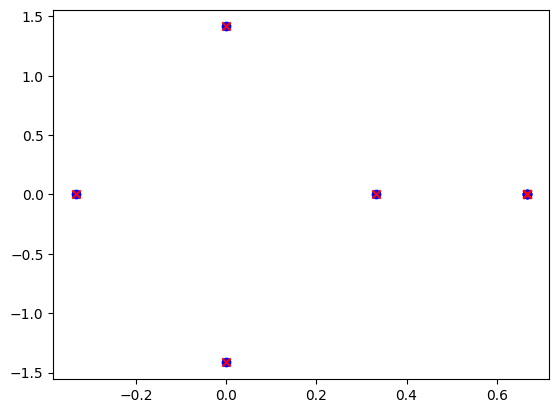

In [6]:
# ===== Twoja implementacja tutaj =====

#1
wspolczynniki4 = np.array([16,-72,-28,558,-990,783,-486,243])
roots4 = nppoly.polyroots(wspolczynniki4)
analityczne = [1/3, -1/3, 2/3, 2/3, 2/3, 1j*np.sqrt(2), -1j*np.sqrt(2)]
plt.scatter([r.real for r in analityczne], [r.imag for r in analityczne], color='blue')
plt.scatter(roots4.real, roots4.imag, color='red', marker='x')



W zadaniu tym przedstawiono pierwiastki wielomianu obliczone numerycznie za pomocą nppoly.polyroots (oznaczone czerwonymi „x”) oraz pierwiastki analityczne (niebieskie punkty). Oba zestawy punktów niemal idealnie się pokrywają – wszystkie pierwiastki numeryczne znajdują się dokładnie w tych samych pozycjach co pierwiastki analityczne. Oznacza to, że dla tego wielomianu metoda numeryczna jest stabilna, a funkcja polyroots wyznacza bardzo dokładne wartości. W zadaniu 2 natomiast przedstawiono wykres dla wielomianu, którego jedyny pierwiastek to x = 1. W tym przypadku zamiast jednego punktu otrzymano osiem punktów rozproszonych wokół jedności. Część rzeczywista pierwiastków waha się w zakresie ok. 0.98–1.02, a część urojona od −0.02 do 0.02. Rozrzut ten wynika nie z błędu matematycznego, ale z niestabilności numerycznej wynikającej z obecności pierwiastka o wysokiej krotności. Wielokrotne pierwiastki są bardzo wrażliwe na błędy zaokrągleń i nawet minimalne zakłócenia powodują, że numeryczne pierwiastki „rozchodzą się” w płaszczyźnie zespolonej.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

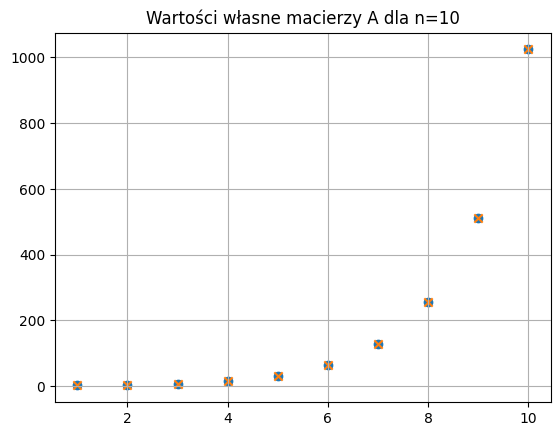

--------------------------------------------------


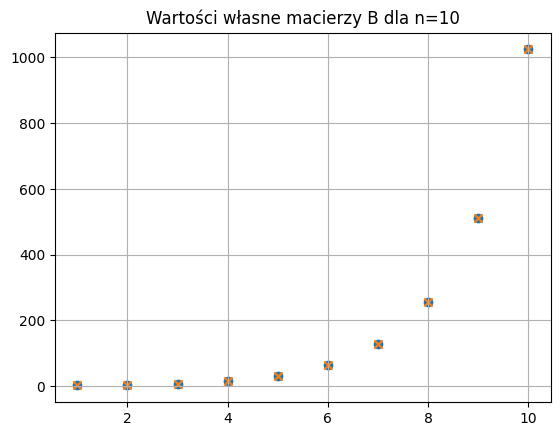

--------------------------------------------------


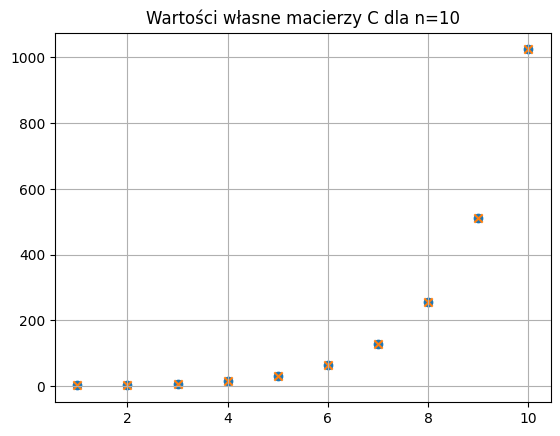

--------------------------------------------------


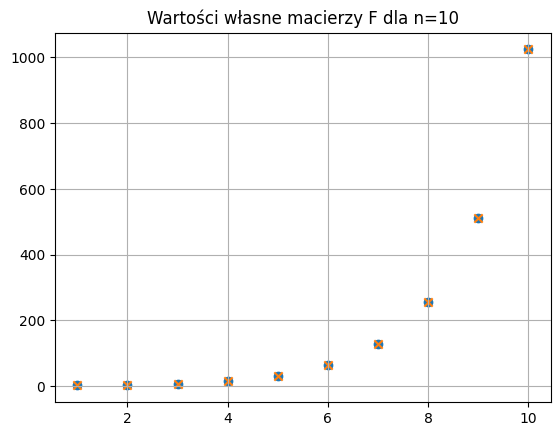

--------------------------------------------------


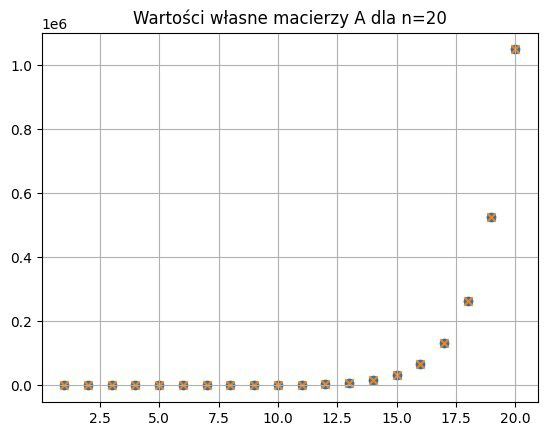

--------------------------------------------------


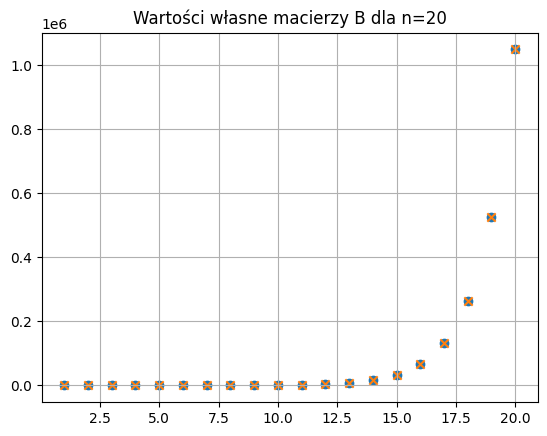

--------------------------------------------------


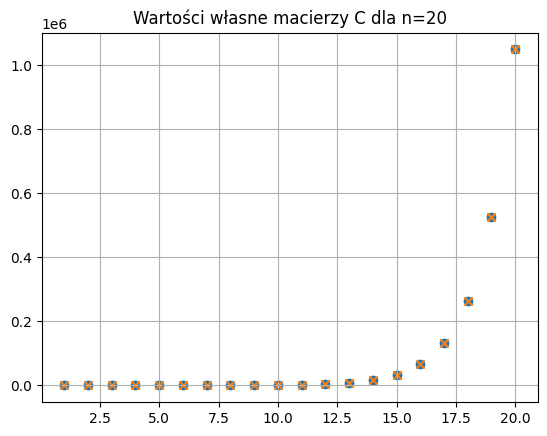

--------------------------------------------------


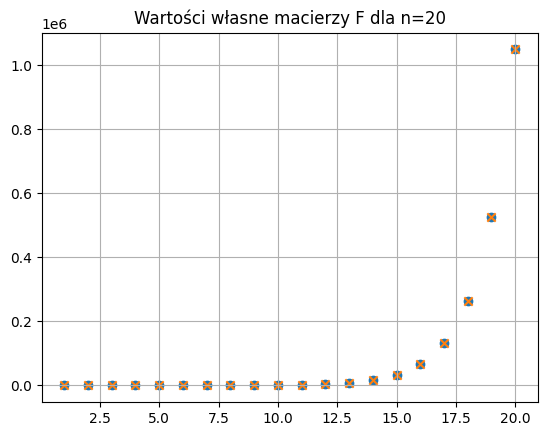

--------------------------------------------------


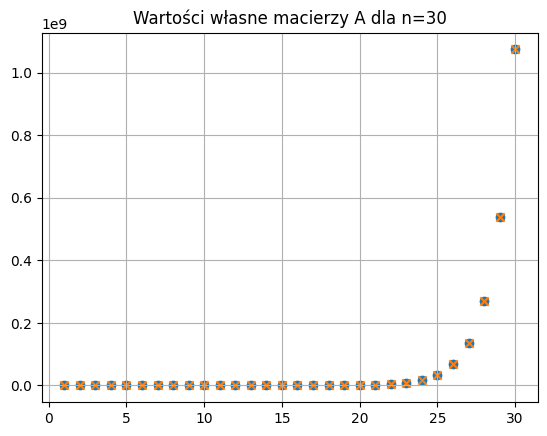

--------------------------------------------------


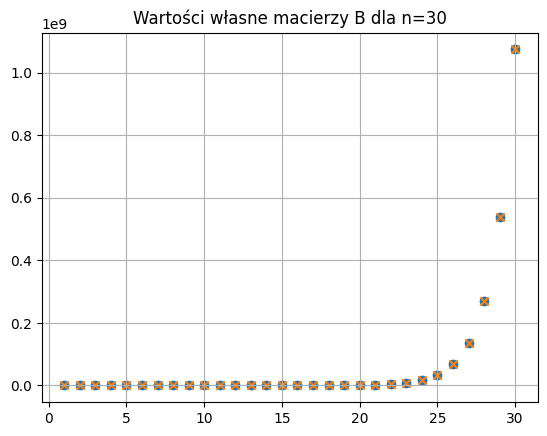

--------------------------------------------------


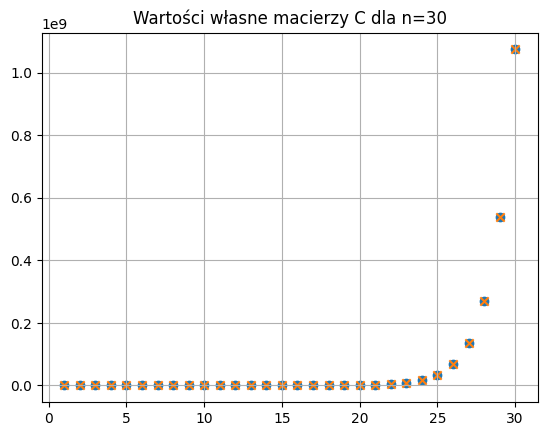

--------------------------------------------------


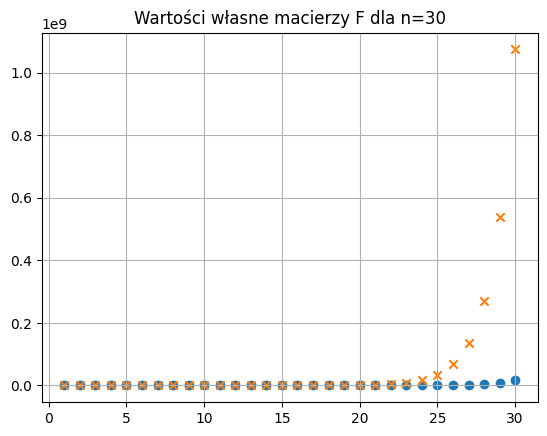

--------------------------------------------------


In [8]:
# ===== Twoja implementacja tutaj =====
from main import is_nonsingular

n = [10,20,30]
war_val = []
for i in n:
    A = np.zeros((i,i))
    for j in range(0,i):
        A[j][j] = 2**(j+1)
    wartosci_wlasne = np.linalg.eigvals(A)
    analityczne_war_wlasne = np.diag(A)
    war_val.append(wartosci_wlasne)
    plt.scatter(range(1,i+1), wartosci_wlasne)
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy A dla n={i}')
    plt.grid()
    plt.show()
    while True:
        P = np.random.randint(0, 101, (i, i))
        if not is_nonsingular(P):
            break
    B = P @ A @ np.linalg.inv(P)
    Q = np.linalg.qr(P)
    C = Q[0] @ A @ np.linalg.inv(Q[0])
    wartosci_wlasne_C = np.linalg.eigvals(C)

    wartosci_wlasne_B = np.linalg.eigvals(B)
    posortowane_wartosci = wartosci_wlasne_B[::-1]
    
    wielomian_char = nppoly.polyfromroots(analityczne_war_wlasne)
    F = main.frob_a(wielomian_char)
    wartosci_wlasne_F = np.linalg.eigvals(F)
    posortowane_wartosci_F = wartosci_wlasne_F[::-1]
    
    print('-'*50)
    plt.scatter(range(1,i+1), posortowane_wartosci)
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy B dla n={i}')
    plt.grid()
    plt.show()
    print('-'*50)
    plt.scatter(range(1,i+1), wartosci_wlasne_C_sorted := wartosci_wlasne_C[::-1])
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy C dla n={i}')
    plt.grid()
    plt.show()
    print('-'*50)
    plt.scatter(range(1,i+1), posortowane_wartosci_F)
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy F dla n={i}')
    plt.grid()
    plt.show()
    print('-'*50)


**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)